In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
# Loading the dataset 
tem=pd.read_csv('data.csv')

In [171]:
df=tem[['x','y']]

In [172]:
df.head(2)

,x,y
0,12,39
1,20,39


In [173]:
df.shape

(19, 2)

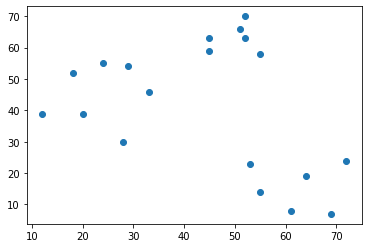

In [174]:
plt.scatter(df['x'],df['y'])

In [175]:
# KMeas Step 1 - Select Random points as CENTROIDS.
np.random.seed(200)
k=3
centroids={
    i+1:[np.random.randint(0,80),np.random.randint(0,80)]
    for i in range(k)}
print(centroids)

{1: [26, 16], 2: [68, 42], 3: [55, 76]}


26 16 <class 'dict'>
68 42 <class 'dict'>
55 76 <class 'dict'>


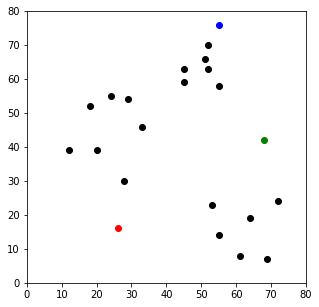

In [176]:
# Step 2 - Plot Datapoints with Centroid -

fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color='k')
colmap={1:'r',2:'g',3:'b'}

for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
    print(*centroids[i],type(centroids))
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

In [177]:
# Set 3 - Calculate The distance of centroids with respect to all datapoints and assign the datapoints to closest cluster
def assignment(df,centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)]=(np.sqrt((df['x']-centroids[i][0])**2  + (df['y']-centroids[i][1])**2))
    centroid_distance_cols=['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest']=df.loc[:,centroid_distance_cols].idxmin(axis=1)
    df['closest']=df['closest'].map(lambda x:int(x.lstrip('distance_from')))
    df['color']=df['closest'].map(lambda x:colmap[x])
    print(centroid_distance_cols)
    print(df)
    return df
df=assignment(df,centroids)
df

['distance_from_1', 'distance_from_2', 'distance_from_3']
     x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0   12  39        26.925824        56.080300        56.727418        1     r
1   20  39        23.769729        48.093659        50.931326        1     r
2   28  30        14.142136        41.761226        53.338541        1     r
3   18  52        36.878178        50.990195        44.102154        1     r
4   29  54        38.118237        40.804412        34.058773        3     b
5   33  46        30.805844        35.227830        37.202150        1     r
6   24  55        39.051248        45.880279        37.443290        3     b
7   45  59        47.010637        28.600699        19.723083        3     b
8   45  63        50.695167        31.144823        16.401219        3     b
9   52  70        59.933296        32.249031         6.708204        3     b
10  51  66        55.901699        29.410882        10.770330        3     b
11  52  63        

,x,y,distance_from_1,distance_from_2,distance_from_3,closest,color
0,12,39,26.925824,56.080300,56.727418,1,r
1,20,39,23.769729,48.093659,50.931326,1,r
2,28,30,14.142136,41.761226,53.338541,1,r
3,18,52,36.878178,50.990195,44.102154,1,r
4,29,54,38.118237,40.804412,34.058773,3,b
5,33,46,30.805844,35.227830,37.202150,1,r
6,24,55,39.051248,45.880279,37.443290,3,b
7,45,59,47.010637,28.600699,19.723083,3,b
8,45,63,50.695167,31.144823,16.401219,3,b
9,52,70,59.933296,32.249031,6.708204,3,b


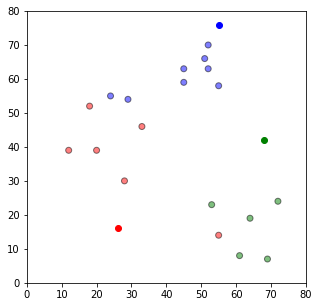

In [178]:
# Display the result in the form of a Graph
fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

In [179]:
# Update the centroid position to make correct position basis the average distance of datpoints from the centroid defined -
import copy
old_centroids=copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0]=np.mean(df[df['closest']==i]['x'])
        centroids[i][0]=np.mean(df[df['closest']==i]['y'])
    return k

In [180]:
# Calling update function to update centroids -
centroids=update(centroids)

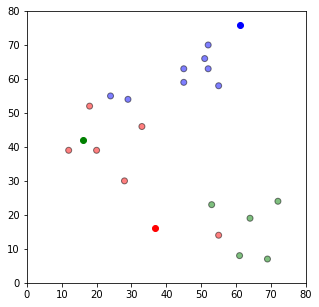

In [181]:
# plot the new centroid positions
fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

In [182]:
# Repeat Steps 3 till above step to update the centroids 
def assignment(df,centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)]=(np.sqrt((df['x']-centroids[i][0])**2  + (df['y']-centroids[i][1])**2))
    centroid_distance_cols=['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest']=df.loc[:,centroid_distance_cols].idxmin(axis=1)
    df['closest']=df['closest'].map(lambda x:int(x.lstrip('distance_from')))
    df['color']=df['closest'].map(lambda x:colmap[x])
    print(centroid_distance_cols)
    print(df)
    return df
df=assignment(df,centroids)
df

['distance_from_1', 'distance_from_2', 'distance_from_3']
     x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0   12  39        33.726020         5.161395        61.400326        2     g
1   20  39        28.403834         4.841487        55.226805        2     g
2   28  30        16.465452        16.829736        56.612719        1     r
3   18  52        40.551750        10.160709        49.244289        2     g
4   29  54        38.765678        17.545370        38.832976        2     g
5   33  46        30.223243        17.269627        41.036569        2     g
6   24  55        41.005420        15.160475        42.544095        2     g
7   45  59        43.800051        33.443086        23.345235        3     b
8   45  63        47.733054        35.643232        20.615528        3     b
9   52  70        56.134758        45.449312        10.816654        3     b
10  51  66        52.013887        42.273396        14.142136        3     b
11  52  63        

,x,y,distance_from_1,distance_from_2,distance_from_3,closest,color
0,12,39,33.726020,5.161395,61.400326,2,g
1,20,39,28.403834,4.841487,55.226805,2,g
2,28,30,16.465452,16.829736,56.612719,1,r
3,18,52,40.551750,10.160709,49.244289,2,g
4,29,54,38.765678,17.545370,38.832976,2,g
5,33,46,30.223243,17.269627,41.036569,2,g
6,24,55,41.005420,15.160475,42.544095,2,g
7,45,59,43.800051,33.443086,23.345235,3,b
8,45,63,47.733054,35.643232,20.615528,3,b
9,52,70,56.134758,45.449312,10.816654,3,b


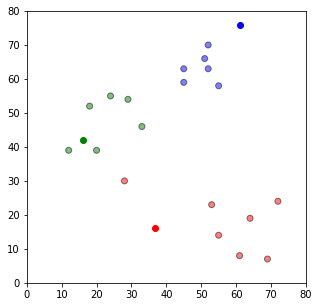

In [183]:
fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

In [184]:
import copy
old_centroids=copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0]=np.mean(df[df['closest']==i]['x'])
        centroids[i][0]=np.mean(df[df['closest']==i]['y'])
    return k

In [185]:
centroids=update(centroids)

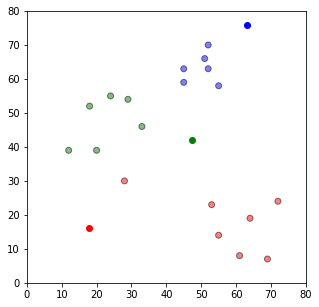

In [186]:
fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

while True:
    closest_centroids=df['closest'].copy(deep=True)
    centroids=update(centroids)
    df=assignment(df,centroids)
    if closest_centroids.equals(df['closest']):
        break
fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0.80)
plt.ylim(0,80)
plt.show()

In [187]:
def assignment(df,centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)]=(np.sqrt((df['x']-centroids[i][0])**2  + (df['y']-centroids[i][1])**2))
    centroid_distance_cols=['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest']=df.loc[:,centroid_distance_cols].idxmin(axis=1)
    df['closest']=df['closest'].map(lambda x:int(x.lstrip('distance_from')))
    df['color']=df['closest'].map(lambda x:colmap[x])
    print(centroid_distance_cols)
    print(df)
    return df
df=assignment(df,centroids)
df

['distance_from_1', 'distance_from_2', 'distance_from_3']
     x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0   12  39        23.734071        35.626535        63.142915        1     r
1   20  39        23.099607        27.663152        56.853857        1     r
2   28  30        17.288075        22.896506        57.902456        1     r
3   18  52        36.000283        31.148836        51.147119        2     g
4   29  54        39.600041        22.051077        40.636943        2     g
5   33  46        33.605150        15.041609        42.544421        2     g
6   24  55        39.480814        26.856098        44.441285        2     g
7   45  59        50.850120        17.182840        24.880269        2     g
8   45  63        54.274623        21.148286        22.338930        2     g
9   52  70        63.888455        28.359302        12.676531        3     b
10  51  66        59.987073        24.253866        15.748898        3     b
11  52  63        

,x,y,distance_from_1,distance_from_2,distance_from_3,closest,color
0,12,39,23.734071,35.626535,63.142915,1,r
1,20,39,23.099607,27.663152,56.853857,1,r
2,28,30,17.288075,22.896506,57.902456,1,r
3,18,52,36.000283,31.148836,51.147119,2,g
4,29,54,39.600041,22.051077,40.636943,2,g
5,33,46,33.605150,15.041609,42.544421,2,g
6,24,55,39.480814,26.856098,44.441285,2,g
7,45,59,50.850120,17.182840,24.880269,2,g
8,45,63,54.274623,21.148286,22.338930,2,g
9,52,70,63.888455,28.359302,12.676531,3,b


In [188]:
import copy
old_centroids=copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0]=np.mean(df[df['closest']==i]['x'])
        centroids[i][0]=np.mean(df[df['closest']==i]['y'])
    return k

In [189]:
centroids=update(centroids)

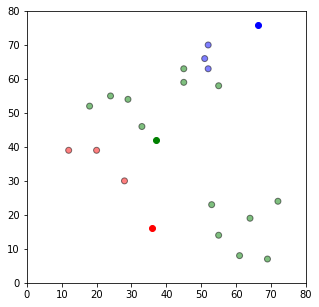

In [190]:
fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

['distance_from_1', 'distance_from_2', 'distance_from_3']
     x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0   12  39        33.241540        25.255733        65.735159        2     g
1   20  39        28.017851        17.338434        59.293994        2     g
2   28  30        16.124515        15.046280        59.878581        2     g
3   18  52        40.249224        21.539011        53.963980        2     g
4   29  54        38.639358        14.465016        43.333333        2     g
5   33  46        30.149627         5.711506        44.845413        2     g
6   24  55        40.804412        18.439249        47.255805        2     g
7   45  59        43.931765        18.755670        27.278400        2     g
8   45  63        47.853944        22.444936        24.982216        2     g
9   52  70        56.320511        31.728508        15.538483        3     b
10  51  66        52.201533        27.746208        18.306040        3     b
11  52  63        

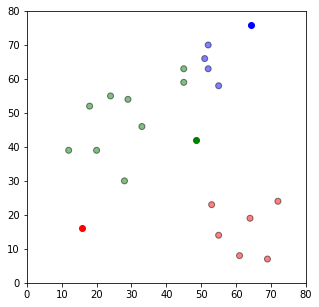

In [191]:
def assignment(df,centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)]=(np.sqrt((df['x']-centroids[i][0])**2  + (df['y']-centroids[i][1])**2))
    centroid_distance_cols=['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest']=df.loc[:,centroid_distance_cols].idxmin(axis=1)
    df['closest']=df['closest'].map(lambda x:int(x.lstrip('distance_from')))
    df['color']=df['closest'].map(lambda x:colmap[x])
    print(centroid_distance_cols)
    print(df)
    return df
df=assignment(df,centroids)
df

import copy
old_centroids=copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0]=np.mean(df[df['closest']==i]['x'])
        centroids[i][0]=np.mean(df[df['closest']==i]['y'])
    return k

centroids=update(centroids)

fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

['distance_from_1', 'distance_from_2', 'distance_from_3']
     x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0   12  39        23.317256        36.678449        64.023921        1     r
1   20  39        23.374369        28.712711        57.680694        1     r
2   28  30        18.547986        23.801909        58.566735        1     r
3   18  52        36.065142        32.150303        52.106262        2     g
4   29  54        40.216428        22.943839        41.551925        2     g
5   33  46        34.564352        16.061610        43.319309        2     g
6   24  55        39.845884        27.784444        45.398926        2     g
7   45  59        51.958584        17.367843        25.681949        2     g
8   45  63        55.314505        21.298873        23.228485        2     g
9   52  70        64.992521        28.211065        13.640473        3     b
10  51  66        61.128508        24.124164        16.600075        3     b
11  52  63        

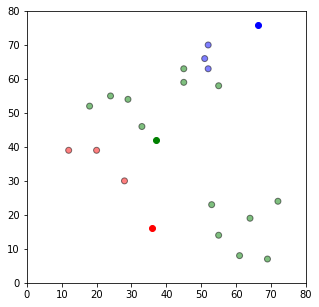

In [192]:
def assignment(df,centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)]=(np.sqrt((df['x']-centroids[i][0])**2  + (df['y']-centroids[i][1])**2))
    centroid_distance_cols=['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest']=df.loc[:,centroid_distance_cols].idxmin(axis=1)
    df['closest']=df['closest'].map(lambda x:int(x.lstrip('distance_from')))
    df['color']=df['closest'].map(lambda x:colmap[x])
    print(centroid_distance_cols)
    print(df)
    return df
df=assignment(df,centroids)
df

import copy
old_centroids=copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0]=np.mean(df[df['closest']==i]['x'])
        centroids[i][0]=np.mean(df[df['closest']==i]['y'])
    return k

centroids=update(centroids)

fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

['distance_from_1', 'distance_from_2', 'distance_from_3']
     x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0   12  39        33.241540        25.255733        65.735159        2     g
1   20  39        28.017851        17.338434        59.293994        2     g
2   28  30        16.124515        15.046280        59.878581        2     g
3   18  52        40.249224        21.539011        53.963980        2     g
4   29  54        38.639358        14.465016        43.333333        2     g
5   33  46        30.149627         5.711506        44.845413        2     g
6   24  55        40.804412        18.439249        47.255805        2     g
7   45  59        43.931765        18.755670        27.278400        2     g
8   45  63        47.853944        22.444936        24.982216        2     g
9   52  70        56.320511        31.728508        15.538483        3     b
10  51  66        52.201533        27.746208        18.306040        3     b
11  52  63        

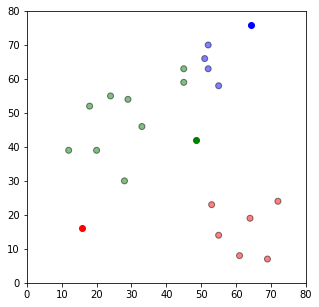

In [193]:
def assignment(df,centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)]=(np.sqrt((df['x']-centroids[i][0])**2  + (df['y']-centroids[i][1])**2))
    centroid_distance_cols=['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest']=df.loc[:,centroid_distance_cols].idxmin(axis=1)
    df['closest']=df['closest'].map(lambda x:int(x.lstrip('distance_from')))
    df['color']=df['closest'].map(lambda x:colmap[x])
    print(centroid_distance_cols)
    print(df)
    return df
df=assignment(df,centroids)
df

import copy
old_centroids=copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0]=np.mean(df[df['closest']==i]['x'])
        centroids[i][0]=np.mean(df[df['closest']==i]['y'])
    return k

centroids=update(centroids)

fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

['distance_from_1', 'distance_from_2', 'distance_from_3']
     x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0   12  39        23.317256        36.678449        64.023921        1     r
1   20  39        23.374369        28.712711        57.680694        1     r
2   28  30        18.547986        23.801909        58.566735        1     r
3   18  52        36.065142        32.150303        52.106262        2     g
4   29  54        40.216428        22.943839        41.551925        2     g
5   33  46        34.564352        16.061610        43.319309        2     g
6   24  55        39.845884        27.784444        45.398926        2     g
7   45  59        51.958584        17.367843        25.681949        2     g
8   45  63        55.314505        21.298873        23.228485        2     g
9   52  70        64.992521        28.211065        13.640473        3     b
10  51  66        61.128508        24.124164        16.600075        3     b
11  52  63        

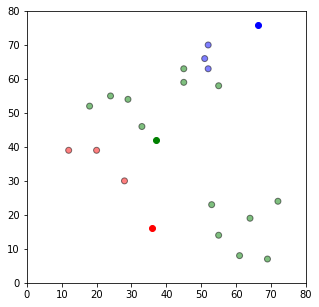

In [194]:
def assignment(df,centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)]=(np.sqrt((df['x']-centroids[i][0])**2  + (df['y']-centroids[i][1])**2))
    centroid_distance_cols=['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest']=df.loc[:,centroid_distance_cols].idxmin(axis=1)
    df['closest']=df['closest'].map(lambda x:int(x.lstrip('distance_from')))
    df['color']=df['closest'].map(lambda x:colmap[x])
    print(centroid_distance_cols)
    print(df)
    return df
df=assignment(df,centroids)
df

import copy
old_centroids=copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0]=np.mean(df[df['closest']==i]['x'])
        centroids[i][0]=np.mean(df[df['closest']==i]['y'])
    return k

centroids=update(centroids)

fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

['distance_from_1', 'distance_from_2', 'distance_from_3']
     x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0   12  39        33.241540        25.255733        65.735159        2     g
1   20  39        28.017851        17.338434        59.293994        2     g
2   28  30        16.124515        15.046280        59.878581        2     g
3   18  52        40.249224        21.539011        53.963980        2     g
4   29  54        38.639358        14.465016        43.333333        2     g
5   33  46        30.149627         5.711506        44.845413        2     g
6   24  55        40.804412        18.439249        47.255805        2     g
7   45  59        43.931765        18.755670        27.278400        2     g
8   45  63        47.853944        22.444936        24.982216        2     g
9   52  70        56.320511        31.728508        15.538483        3     b
10  51  66        52.201533        27.746208        18.306040        3     b
11  52  63        

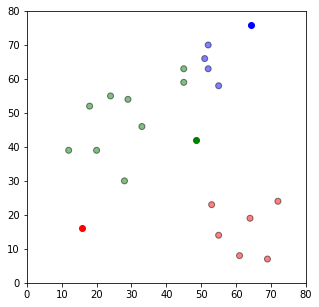

In [195]:
def assignment(df,centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)]=(np.sqrt((df['x']-centroids[i][0])**2  + (df['y']-centroids[i][1])**2))
    centroid_distance_cols=['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest']=df.loc[:,centroid_distance_cols].idxmin(axis=1)
    df['closest']=df['closest'].map(lambda x:int(x.lstrip('distance_from')))
    df['color']=df['closest'].map(lambda x:colmap[x])
    print(centroid_distance_cols)
    print(df)
    return df
df=assignment(df,centroids)
df

import copy
old_centroids=copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0]=np.mean(df[df['closest']==i]['x'])
        centroids[i][0]=np.mean(df[df['closest']==i]['y'])
    return k

centroids=update(centroids)

fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

['distance_from_1', 'distance_from_2', 'distance_from_3']
     x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0   12  39        23.317256        36.678449        64.023921        1     r
1   20  39        23.374369        28.712711        57.680694        1     r
2   28  30        18.547986        23.801909        58.566735        1     r
3   18  52        36.065142        32.150303        52.106262        2     g
4   29  54        40.216428        22.943839        41.551925        2     g
5   33  46        34.564352        16.061610        43.319309        2     g
6   24  55        39.845884        27.784444        45.398926        2     g
7   45  59        51.958584        17.367843        25.681949        2     g
8   45  63        55.314505        21.298873        23.228485        2     g
9   52  70        64.992521        28.211065        13.640473        3     b
10  51  66        61.128508        24.124164        16.600075        3     b
11  52  63        

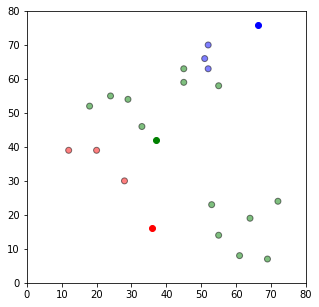

In [196]:
def assignment(df,centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)]=(np.sqrt((df['x']-centroids[i][0])**2  + (df['y']-centroids[i][1])**2))
    centroid_distance_cols=['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest']=df.loc[:,centroid_distance_cols].idxmin(axis=1)
    df['closest']=df['closest'].map(lambda x:int(x.lstrip('distance_from')))
    df['color']=df['closest'].map(lambda x:colmap[x])
    print(centroid_distance_cols)
    print(df)
    return df
df=assignment(df,centroids)
df

import copy
old_centroids=copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0]=np.mean(df[df['closest']==i]['x'])
        centroids[i][0]=np.mean(df[df['closest']==i]['y'])
    return k

centroids=update(centroids)

fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

['distance_from_1', 'distance_from_2', 'distance_from_3']
     x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0   12  39        33.241540        25.255733        65.735159        2     g
1   20  39        28.017851        17.338434        59.293994        2     g
2   28  30        16.124515        15.046280        59.878581        2     g
3   18  52        40.249224        21.539011        53.963980        2     g
4   29  54        38.639358        14.465016        43.333333        2     g
5   33  46        30.149627         5.711506        44.845413        2     g
6   24  55        40.804412        18.439249        47.255805        2     g
7   45  59        43.931765        18.755670        27.278400        2     g
8   45  63        47.853944        22.444936        24.982216        2     g
9   52  70        56.320511        31.728508        15.538483        3     b
10  51  66        52.201533        27.746208        18.306040        3     b
11  52  63        

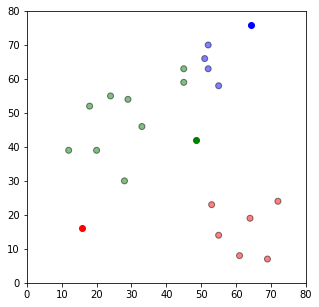

In [197]:
def assignment(df,centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)]=(np.sqrt((df['x']-centroids[i][0])**2  + (df['y']-centroids[i][1])**2))
    centroid_distance_cols=['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest']=df.loc[:,centroid_distance_cols].idxmin(axis=1)
    df['closest']=df['closest'].map(lambda x:int(x.lstrip('distance_from')))
    df['color']=df['closest'].map(lambda x:colmap[x])
    print(centroid_distance_cols)
    print(df)
    return df
df=assignment(df,centroids)
df

import copy
old_centroids=copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0]=np.mean(df[df['closest']==i]['x'])
        centroids[i][0]=np.mean(df[df['closest']==i]['y'])
    return k

centroids=update(centroids)

fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

['distance_from_1', 'distance_from_2', 'distance_from_3']
     x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0   12  39        23.317256        36.678449        64.023921        1     r
1   20  39        23.374369        28.712711        57.680694        1     r
2   28  30        18.547986        23.801909        58.566735        1     r
3   18  52        36.065142        32.150303        52.106262        2     g
4   29  54        40.216428        22.943839        41.551925        2     g
5   33  46        34.564352        16.061610        43.319309        2     g
6   24  55        39.845884        27.784444        45.398926        2     g
7   45  59        51.958584        17.367843        25.681949        2     g
8   45  63        55.314505        21.298873        23.228485        2     g
9   52  70        64.992521        28.211065        13.640473        3     b
10  51  66        61.128508        24.124164        16.600075        3     b
11  52  63        

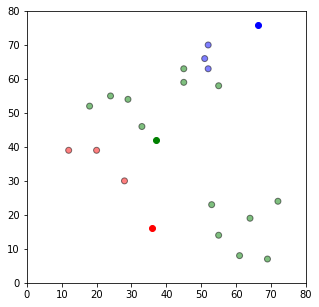

In [198]:
def assignment(df,centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)]=(np.sqrt((df['x']-centroids[i][0])**2  + (df['y']-centroids[i][1])**2))
    centroid_distance_cols=['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest']=df.loc[:,centroid_distance_cols].idxmin(axis=1)
    df['closest']=df['closest'].map(lambda x:int(x.lstrip('distance_from')))
    df['color']=df['closest'].map(lambda x:colmap[x])
    print(centroid_distance_cols)
    print(df)
    return df
df=assignment(df,centroids)
df

import copy
old_centroids=copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0]=np.mean(df[df['closest']==i]['x'])
        centroids[i][0]=np.mean(df[df['closest']==i]['y'])
    return k

centroids=update(centroids)

fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

['distance_from_1', 'distance_from_2', 'distance_from_3']
     x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0   12  39        33.241540        25.255733        65.735159        2     g
1   20  39        28.017851        17.338434        59.293994        2     g
2   28  30        16.124515        15.046280        59.878581        2     g
3   18  52        40.249224        21.539011        53.963980        2     g
4   29  54        38.639358        14.465016        43.333333        2     g
5   33  46        30.149627         5.711506        44.845413        2     g
6   24  55        40.804412        18.439249        47.255805        2     g
7   45  59        43.931765        18.755670        27.278400        2     g
8   45  63        47.853944        22.444936        24.982216        2     g
9   52  70        56.320511        31.728508        15.538483        3     b
10  51  66        52.201533        27.746208        18.306040        3     b
11  52  63        

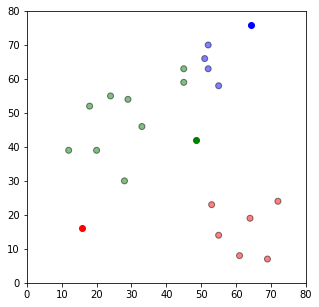

In [199]:
def assignment(df,centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)]=(np.sqrt((df['x']-centroids[i][0])**2  + (df['y']-centroids[i][1])**2))
    centroid_distance_cols=['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest']=df.loc[:,centroid_distance_cols].idxmin(axis=1)
    df['closest']=df['closest'].map(lambda x:int(x.lstrip('distance_from')))
    df['color']=df['closest'].map(lambda x:colmap[x])
    print(centroid_distance_cols)
    print(df)
    return df
df=assignment(df,centroids)
df

import copy
old_centroids=copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0]=np.mean(df[df['closest']==i]['x'])
        centroids[i][0]=np.mean(df[df['closest']==i]['y'])
    return k

centroids=update(centroids)

fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

['distance_from_1', 'distance_from_2', 'distance_from_3']
     x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0   12  39        23.317256        36.678449        64.023921        1     r
1   20  39        23.374369        28.712711        57.680694        1     r
2   28  30        18.547986        23.801909        58.566735        1     r
3   18  52        36.065142        32.150303        52.106262        2     g
4   29  54        40.216428        22.943839        41.551925        2     g
5   33  46        34.564352        16.061610        43.319309        2     g
6   24  55        39.845884        27.784444        45.398926        2     g
7   45  59        51.958584        17.367843        25.681949        2     g
8   45  63        55.314505        21.298873        23.228485        2     g
9   52  70        64.992521        28.211065        13.640473        3     b
10  51  66        61.128508        24.124164        16.600075        3     b
11  52  63        

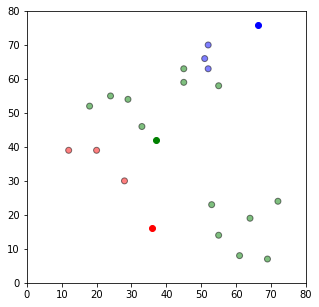

In [200]:
def assignment(df,centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)]=(np.sqrt((df['x']-centroids[i][0])**2  + (df['y']-centroids[i][1])**2))
    centroid_distance_cols=['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest']=df.loc[:,centroid_distance_cols].idxmin(axis=1)
    df['closest']=df['closest'].map(lambda x:int(x.lstrip('distance_from')))
    df['color']=df['closest'].map(lambda x:colmap[x])
    print(centroid_distance_cols)
    print(df)
    return df
df=assignment(df,centroids)
df

import copy
old_centroids=copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0]=np.mean(df[df['closest']==i]['x'])
        centroids[i][0]=np.mean(df[df['closest']==i]['y'])
    return k

centroids=update(centroids)

fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

['distance_from_1', 'distance_from_2', 'distance_from_3']
     x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0   12  39        33.241540        25.255733        65.735159        2     g
1   20  39        28.017851        17.338434        59.293994        2     g
2   28  30        16.124515        15.046280        59.878581        2     g
3   18  52        40.249224        21.539011        53.963980        2     g
4   29  54        38.639358        14.465016        43.333333        2     g
5   33  46        30.149627         5.711506        44.845413        2     g
6   24  55        40.804412        18.439249        47.255805        2     g
7   45  59        43.931765        18.755670        27.278400        2     g
8   45  63        47.853944        22.444936        24.982216        2     g
9   52  70        56.320511        31.728508        15.538483        3     b
10  51  66        52.201533        27.746208        18.306040        3     b
11  52  63        

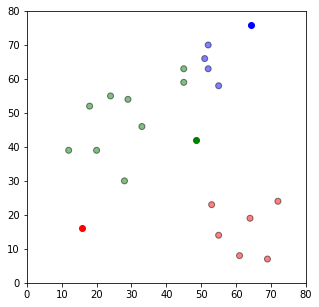

In [201]:
def assignment(df,centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)]=(np.sqrt((df['x']-centroids[i][0])**2  + (df['y']-centroids[i][1])**2))
    centroid_distance_cols=['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest']=df.loc[:,centroid_distance_cols].idxmin(axis=1)
    df['closest']=df['closest'].map(lambda x:int(x.lstrip('distance_from')))
    df['color']=df['closest'].map(lambda x:colmap[x])
    print(centroid_distance_cols)
    print(df)
    return df
df=assignment(df,centroids)
df

import copy
old_centroids=copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0]=np.mean(df[df['closest']==i]['x'])
        centroids[i][0]=np.mean(df[df['closest']==i]['y'])
    return k

centroids=update(centroids)

fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

['distance_from_1', 'distance_from_2', 'distance_from_3']
     x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0   12  39        23.317256        36.678449        64.023921        1     r
1   20  39        23.374369        28.712711        57.680694        1     r
2   28  30        18.547986        23.801909        58.566735        1     r
3   18  52        36.065142        32.150303        52.106262        2     g
4   29  54        40.216428        22.943839        41.551925        2     g
5   33  46        34.564352        16.061610        43.319309        2     g
6   24  55        39.845884        27.784444        45.398926        2     g
7   45  59        51.958584        17.367843        25.681949        2     g
8   45  63        55.314505        21.298873        23.228485        2     g
9   52  70        64.992521        28.211065        13.640473        3     b
10  51  66        61.128508        24.124164        16.600075        3     b
11  52  63        

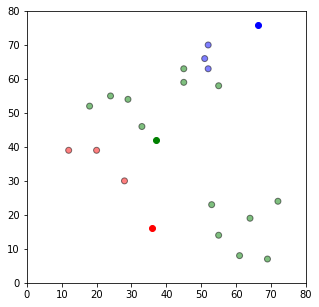

In [202]:
def assignment(df,centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)]=(np.sqrt((df['x']-centroids[i][0])**2  + (df['y']-centroids[i][1])**2))
    centroid_distance_cols=['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest']=df.loc[:,centroid_distance_cols].idxmin(axis=1)
    df['closest']=df['closest'].map(lambda x:int(x.lstrip('distance_from')))
    df['color']=df['closest'].map(lambda x:colmap[x])
    print(centroid_distance_cols)
    print(df)
    return df
df=assignment(df,centroids)
df

import copy
old_centroids=copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0]=np.mean(df[df['closest']==i]['x'])
        centroids[i][0]=np.mean(df[df['closest']==i]['y'])
    return k

centroids=update(centroids)

fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

['distance_from_1', 'distance_from_2', 'distance_from_3']
     x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0   12  39        33.241540        25.255733        65.735159        2     g
1   20  39        28.017851        17.338434        59.293994        2     g
2   28  30        16.124515        15.046280        59.878581        2     g
3   18  52        40.249224        21.539011        53.963980        2     g
4   29  54        38.639358        14.465016        43.333333        2     g
5   33  46        30.149627         5.711506        44.845413        2     g
6   24  55        40.804412        18.439249        47.255805        2     g
7   45  59        43.931765        18.755670        27.278400        2     g
8   45  63        47.853944        22.444936        24.982216        2     g
9   52  70        56.320511        31.728508        15.538483        3     b
10  51  66        52.201533        27.746208        18.306040        3     b
11  52  63        

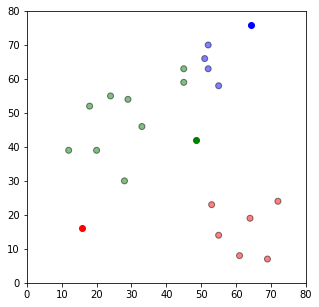

In [203]:
def assignment(df,centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)]=(np.sqrt((df['x']-centroids[i][0])**2  + (df['y']-centroids[i][1])**2))
    centroid_distance_cols=['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest']=df.loc[:,centroid_distance_cols].idxmin(axis=1)
    df['closest']=df['closest'].map(lambda x:int(x.lstrip('distance_from')))
    df['color']=df['closest'].map(lambda x:colmap[x])
    print(centroid_distance_cols)
    print(df)
    return df
df=assignment(df,centroids)
df

import copy
old_centroids=copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0]=np.mean(df[df['closest']==i]['x'])
        centroids[i][0]=np.mean(df[df['closest']==i]['y'])
    return k

centroids=update(centroids)

fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

['distance_from_1', 'distance_from_2', 'distance_from_3']
     x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0   12  39        23.317256        36.678449        64.023921        1     r
1   20  39        23.374369        28.712711        57.680694        1     r
2   28  30        18.547986        23.801909        58.566735        1     r
3   18  52        36.065142        32.150303        52.106262        2     g
4   29  54        40.216428        22.943839        41.551925        2     g
5   33  46        34.564352        16.061610        43.319309        2     g
6   24  55        39.845884        27.784444        45.398926        2     g
7   45  59        51.958584        17.367843        25.681949        2     g
8   45  63        55.314505        21.298873        23.228485        2     g
9   52  70        64.992521        28.211065        13.640473        3     b
10  51  66        61.128508        24.124164        16.600075        3     b
11  52  63        

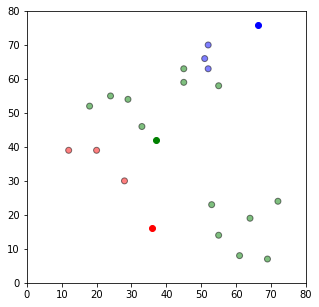

In [204]:
def assignment(df,centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)]=(np.sqrt((df['x']-centroids[i][0])**2  + (df['y']-centroids[i][1])**2))
    centroid_distance_cols=['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest']=df.loc[:,centroid_distance_cols].idxmin(axis=1)
    df['closest']=df['closest'].map(lambda x:int(x.lstrip('distance_from')))
    df['color']=df['closest'].map(lambda x:colmap[x])
    print(centroid_distance_cols)
    print(df)
    return df
df=assignment(df,centroids)
df

import copy
old_centroids=copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0]=np.mean(df[df['closest']==i]['x'])
        centroids[i][0]=np.mean(df[df['closest']==i]['y'])
    return k

centroids=update(centroids)

fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

['distance_from_1', 'distance_from_2', 'distance_from_3']
     x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0   12  39        33.241540        25.255733        65.735159        2     g
1   20  39        28.017851        17.338434        59.293994        2     g
2   28  30        16.124515        15.046280        59.878581        2     g
3   18  52        40.249224        21.539011        53.963980        2     g
4   29  54        38.639358        14.465016        43.333333        2     g
5   33  46        30.149627         5.711506        44.845413        2     g
6   24  55        40.804412        18.439249        47.255805        2     g
7   45  59        43.931765        18.755670        27.278400        2     g
8   45  63        47.853944        22.444936        24.982216        2     g
9   52  70        56.320511        31.728508        15.538483        3     b
10  51  66        52.201533        27.746208        18.306040        3     b
11  52  63        

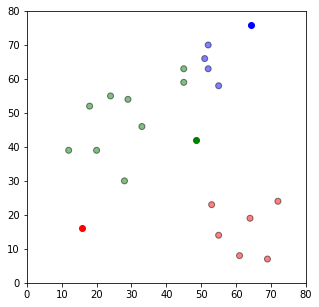

In [205]:
def assignment(df,centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)]=(np.sqrt((df['x']-centroids[i][0])**2  + (df['y']-centroids[i][1])**2))
    centroid_distance_cols=['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest']=df.loc[:,centroid_distance_cols].idxmin(axis=1)
    df['closest']=df['closest'].map(lambda x:int(x.lstrip('distance_from')))
    df['color']=df['closest'].map(lambda x:colmap[x])
    print(centroid_distance_cols)
    print(df)
    return df
df=assignment(df,centroids)
df

import copy
old_centroids=copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0]=np.mean(df[df['closest']==i]['x'])
        centroids[i][0]=np.mean(df[df['closest']==i]['y'])
    return k

centroids=update(centroids)

fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

['distance_from_1', 'distance_from_2', 'distance_from_3']
     x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0   12  39        23.317256        36.678449        64.023921        1     r
1   20  39        23.374369        28.712711        57.680694        1     r
2   28  30        18.547986        23.801909        58.566735        1     r
3   18  52        36.065142        32.150303        52.106262        2     g
4   29  54        40.216428        22.943839        41.551925        2     g
5   33  46        34.564352        16.061610        43.319309        2     g
6   24  55        39.845884        27.784444        45.398926        2     g
7   45  59        51.958584        17.367843        25.681949        2     g
8   45  63        55.314505        21.298873        23.228485        2     g
9   52  70        64.992521        28.211065        13.640473        3     b
10  51  66        61.128508        24.124164        16.600075        3     b
11  52  63        

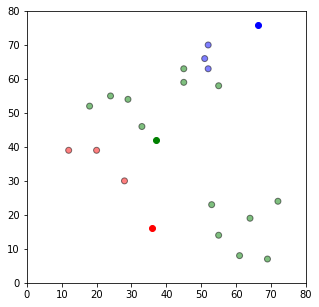

In [206]:
def assignment(df,centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)]=(np.sqrt((df['x']-centroids[i][0])**2  + (df['y']-centroids[i][1])**2))
    centroid_distance_cols=['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest']=df.loc[:,centroid_distance_cols].idxmin(axis=1)
    df['closest']=df['closest'].map(lambda x:int(x.lstrip('distance_from')))
    df['color']=df['closest'].map(lambda x:colmap[x])
    print(centroid_distance_cols)
    print(df)
    return df
df=assignment(df,centroids)
df

import copy
old_centroids=copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0]=np.mean(df[df['closest']==i]['x'])
        centroids[i][0]=np.mean(df[df['closest']==i]['y'])
    return k

centroids=update(centroids)

fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

['distance_from_1', 'distance_from_2', 'distance_from_3']
     x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0   12  39        33.241540        25.255733        65.735159        2     g
1   20  39        28.017851        17.338434        59.293994        2     g
2   28  30        16.124515        15.046280        59.878581        2     g
3   18  52        40.249224        21.539011        53.963980        2     g
4   29  54        38.639358        14.465016        43.333333        2     g
5   33  46        30.149627         5.711506        44.845413        2     g
6   24  55        40.804412        18.439249        47.255805        2     g
7   45  59        43.931765        18.755670        27.278400        2     g
8   45  63        47.853944        22.444936        24.982216        2     g
9   52  70        56.320511        31.728508        15.538483        3     b
10  51  66        52.201533        27.746208        18.306040        3     b
11  52  63        

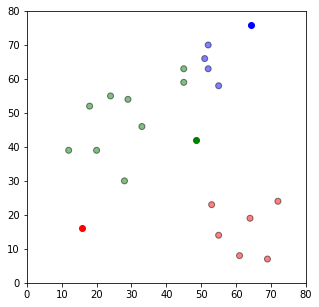

In [207]:
def assignment(df,centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)]=(np.sqrt((df['x']-centroids[i][0])**2  + (df['y']-centroids[i][1])**2))
    centroid_distance_cols=['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest']=df.loc[:,centroid_distance_cols].idxmin(axis=1)
    df['closest']=df['closest'].map(lambda x:int(x.lstrip('distance_from')))
    df['color']=df['closest'].map(lambda x:colmap[x])
    print(centroid_distance_cols)
    print(df)
    return df
df=assignment(df,centroids)
df

import copy
old_centroids=copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0]=np.mean(df[df['closest']==i]['x'])
        centroids[i][0]=np.mean(df[df['closest']==i]['y'])
    return k

centroids=update(centroids)

fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

['distance_from_1', 'distance_from_2', 'distance_from_3']
     x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0   12  39        23.317256        36.678449        64.023921        1     r
1   20  39        23.374369        28.712711        57.680694        1     r
2   28  30        18.547986        23.801909        58.566735        1     r
3   18  52        36.065142        32.150303        52.106262        2     g
4   29  54        40.216428        22.943839        41.551925        2     g
5   33  46        34.564352        16.061610        43.319309        2     g
6   24  55        39.845884        27.784444        45.398926        2     g
7   45  59        51.958584        17.367843        25.681949        2     g
8   45  63        55.314505        21.298873        23.228485        2     g
9   52  70        64.992521        28.211065        13.640473        3     b
10  51  66        61.128508        24.124164        16.600075        3     b
11  52  63        

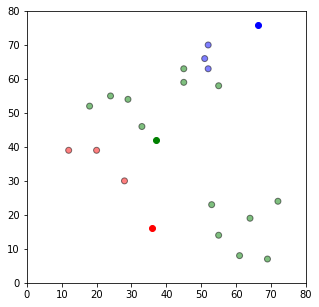

In [208]:
def assignment(df,centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)]=(np.sqrt((df['x']-centroids[i][0])**2  + (df['y']-centroids[i][1])**2))
    centroid_distance_cols=['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest']=df.loc[:,centroid_distance_cols].idxmin(axis=1)
    df['closest']=df['closest'].map(lambda x:int(x.lstrip('distance_from')))
    df['color']=df['closest'].map(lambda x:colmap[x])
    print(centroid_distance_cols)
    print(df)
    return df
df=assignment(df,centroids)
df

import copy
old_centroids=copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0]=np.mean(df[df['closest']==i]['x'])
        centroids[i][0]=np.mean(df[df['closest']==i]['y'])
    return k

centroids=update(centroids)

fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

['distance_from_1', 'distance_from_2', 'distance_from_3']
     x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0   12  39        33.241540        25.255733        65.735159        2     g
1   20  39        28.017851        17.338434        59.293994        2     g
2   28  30        16.124515        15.046280        59.878581        2     g
3   18  52        40.249224        21.539011        53.963980        2     g
4   29  54        38.639358        14.465016        43.333333        2     g
5   33  46        30.149627         5.711506        44.845413        2     g
6   24  55        40.804412        18.439249        47.255805        2     g
7   45  59        43.931765        18.755670        27.278400        2     g
8   45  63        47.853944        22.444936        24.982216        2     g
9   52  70        56.320511        31.728508        15.538483        3     b
10  51  66        52.201533        27.746208        18.306040        3     b
11  52  63        

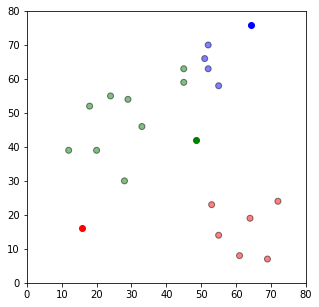

In [209]:
def assignment(df,centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)]=(np.sqrt((df['x']-centroids[i][0])**2  + (df['y']-centroids[i][1])**2))
    centroid_distance_cols=['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest']=df.loc[:,centroid_distance_cols].idxmin(axis=1)
    df['closest']=df['closest'].map(lambda x:int(x.lstrip('distance_from')))
    df['color']=df['closest'].map(lambda x:colmap[x])
    print(centroid_distance_cols)
    print(df)
    return df
df=assignment(df,centroids)
df

import copy
old_centroids=copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0]=np.mean(df[df['closest']==i]['x'])
        centroids[i][0]=np.mean(df[df['closest']==i]['y'])
    return k

centroids=update(centroids)

fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

['distance_from_1', 'distance_from_2', 'distance_from_3']
     x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0   12  39        23.317256        36.678449        64.023921        1     r
1   20  39        23.374369        28.712711        57.680694        1     r
2   28  30        18.547986        23.801909        58.566735        1     r
3   18  52        36.065142        32.150303        52.106262        2     g
4   29  54        40.216428        22.943839        41.551925        2     g
5   33  46        34.564352        16.061610        43.319309        2     g
6   24  55        39.845884        27.784444        45.398926        2     g
7   45  59        51.958584        17.367843        25.681949        2     g
8   45  63        55.314505        21.298873        23.228485        2     g
9   52  70        64.992521        28.211065        13.640473        3     b
10  51  66        61.128508        24.124164        16.600075        3     b
11  52  63        

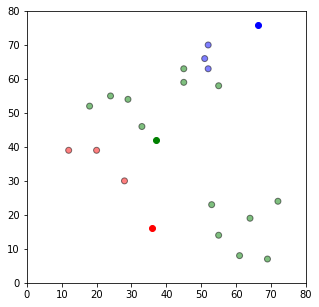

In [210]:
def assignment(df,centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)]=(np.sqrt((df['x']-centroids[i][0])**2  + (df['y']-centroids[i][1])**2))
    centroid_distance_cols=['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest']=df.loc[:,centroid_distance_cols].idxmin(axis=1)
    df['closest']=df['closest'].map(lambda x:int(x.lstrip('distance_from')))
    df['color']=df['closest'].map(lambda x:colmap[x])
    print(centroid_distance_cols)
    print(df)
    return df
df=assignment(df,centroids)
df

import copy
old_centroids=copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0]=np.mean(df[df['closest']==i]['x'])
        centroids[i][0]=np.mean(df[df['closest']==i]['y'])
    return k

centroids=update(centroids)

fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

['distance_from_1', 'distance_from_2', 'distance_from_3']
     x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0   12  39        33.241540        25.255733        65.735159        2     g
1   20  39        28.017851        17.338434        59.293994        2     g
2   28  30        16.124515        15.046280        59.878581        2     g
3   18  52        40.249224        21.539011        53.963980        2     g
4   29  54        38.639358        14.465016        43.333333        2     g
5   33  46        30.149627         5.711506        44.845413        2     g
6   24  55        40.804412        18.439249        47.255805        2     g
7   45  59        43.931765        18.755670        27.278400        2     g
8   45  63        47.853944        22.444936        24.982216        2     g
9   52  70        56.320511        31.728508        15.538483        3     b
10  51  66        52.201533        27.746208        18.306040        3     b
11  52  63        

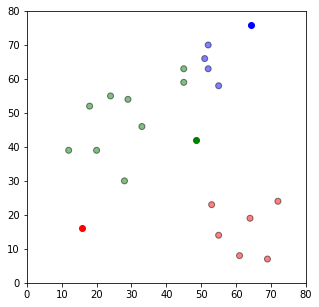

In [211]:
def assignment(df,centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)]=(np.sqrt((df['x']-centroids[i][0])**2  + (df['y']-centroids[i][1])**2))
    centroid_distance_cols=['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest']=df.loc[:,centroid_distance_cols].idxmin(axis=1)
    df['closest']=df['closest'].map(lambda x:int(x.lstrip('distance_from')))
    df['color']=df['closest'].map(lambda x:colmap[x])
    print(centroid_distance_cols)
    print(df)
    return df
df=assignment(df,centroids)
df

import copy
old_centroids=copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0]=np.mean(df[df['closest']==i]['x'])
        centroids[i][0]=np.mean(df[df['closest']==i]['y'])
    return k

centroids=update(centroids)

fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

['distance_from_1', 'distance_from_2', 'distance_from_3']
     x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0   12  39        23.317256        36.678449        64.023921        1     r
1   20  39        23.374369        28.712711        57.680694        1     r
2   28  30        18.547986        23.801909        58.566735        1     r
3   18  52        36.065142        32.150303        52.106262        2     g
4   29  54        40.216428        22.943839        41.551925        2     g
5   33  46        34.564352        16.061610        43.319309        2     g
6   24  55        39.845884        27.784444        45.398926        2     g
7   45  59        51.958584        17.367843        25.681949        2     g
8   45  63        55.314505        21.298873        23.228485        2     g
9   52  70        64.992521        28.211065        13.640473        3     b
10  51  66        61.128508        24.124164        16.600075        3     b
11  52  63        

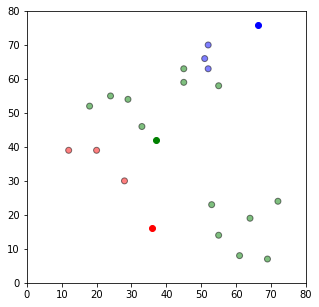

In [212]:
def assignment(df,centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)]=(np.sqrt((df['x']-centroids[i][0])**2  + (df['y']-centroids[i][1])**2))
    centroid_distance_cols=['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest']=df.loc[:,centroid_distance_cols].idxmin(axis=1)
    df['closest']=df['closest'].map(lambda x:int(x.lstrip('distance_from')))
    df['color']=df['closest'].map(lambda x:colmap[x])
    print(centroid_distance_cols)
    print(df)
    return df
df=assignment(df,centroids)
df

import copy
old_centroids=copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0]=np.mean(df[df['closest']==i]['x'])
        centroids[i][0]=np.mean(df[df['closest']==i]['y'])
    return k

centroids=update(centroids)

fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

['distance_from_1', 'distance_from_2', 'distance_from_3']
     x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0   12  39        33.241540        25.255733        65.735159        2     g
1   20  39        28.017851        17.338434        59.293994        2     g
2   28  30        16.124515        15.046280        59.878581        2     g
3   18  52        40.249224        21.539011        53.963980        2     g
4   29  54        38.639358        14.465016        43.333333        2     g
5   33  46        30.149627         5.711506        44.845413        2     g
6   24  55        40.804412        18.439249        47.255805        2     g
7   45  59        43.931765        18.755670        27.278400        2     g
8   45  63        47.853944        22.444936        24.982216        2     g
9   52  70        56.320511        31.728508        15.538483        3     b
10  51  66        52.201533        27.746208        18.306040        3     b
11  52  63        

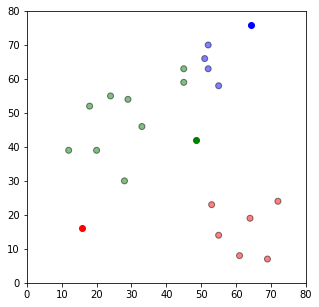

In [213]:
def assignment(df,centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)]=(np.sqrt((df['x']-centroids[i][0])**2  + (df['y']-centroids[i][1])**2))
    centroid_distance_cols=['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest']=df.loc[:,centroid_distance_cols].idxmin(axis=1)
    df['closest']=df['closest'].map(lambda x:int(x.lstrip('distance_from')))
    df['color']=df['closest'].map(lambda x:colmap[x])
    print(centroid_distance_cols)
    print(df)
    return df
df=assignment(df,centroids)
df

import copy
old_centroids=copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0]=np.mean(df[df['closest']==i]['x'])
        centroids[i][0]=np.mean(df[df['closest']==i]['y'])
    return k

centroids=update(centroids)

fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

while True:
    closest_centroids=df['closest'].copy(deep=True)
    centroids=update(centroids)
    df=assignment(df,centroids)
    if closest_centroids.equals(df['closest']):
        break
fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0.80)
plt.ylim(0,80)
plt.show()

# Thus, using Elbow Curve finding the best K-Value for the given clustering -

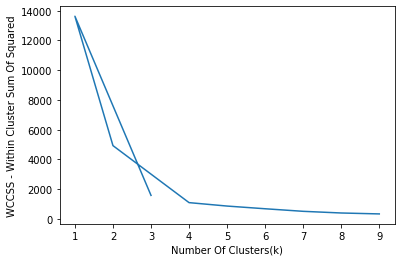

In [217]:
from sklearn.cluster import KMeans 
for k in range(1,10):
    kmeans=KMeans(n_clusters=k,max_iter=1000).fit(tem)
    df['clusters']=kmeans.labels_
    sse[k]=kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()),list(sse.values()))
plt.xlabel('Number Of Clusters(k)')
plt.ylabel('WCCSS - Within Cluster Sum Of Squared')
plt.show()

# Thus at K-Value of 4 the curve gets flatten. Hence, K-Value is the best fitted value for the given clustering.